In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [4]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE',
       'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [5]:
dict = {'CALC': 'alcohol',
        'FAVC': 'caloric_frequently',
        'SCC': 'monitor_cal_daily ',
        'CAEC':'food_bet_meals',
        'FCVC':'veggies',
        'NCP':'no_meals',
        'CH2O':'water',
        'FAF':'physical_act',
        'TUE':'timefortechdevices',
        'MTRANS':'transport',
        'NObeyesdad':'Obesity'}
 
# call rename () method
df.rename(columns=dict,
          inplace=True)

In [6]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'alcohol', 'caloric_frequently',
       'veggies', 'no_meals', 'monitor_cal_daily ', 'SMOKE', 'water',
       'family_history_with_overweight', 'physical_act', 'timefortechdevices',
       'food_bet_meals', 'transport', 'Obesity'],
      dtype='object')

UNIVARIATE ANALYSIS

AGE

<Axes: xlabel='Age', ylabel='Count'>

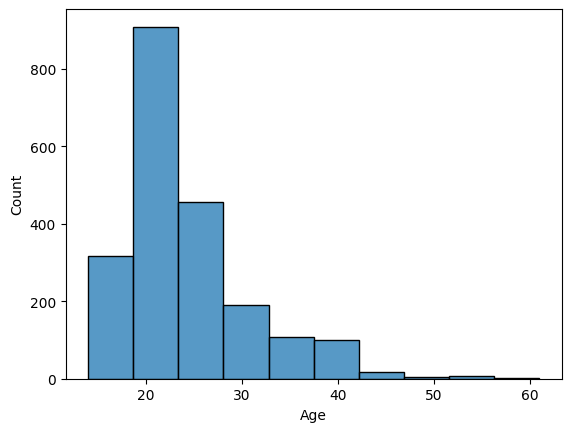

In [7]:
sns.histplot(x="Age",data=df,bins=10)

<Axes: xlabel='Age', ylabel='Count'>

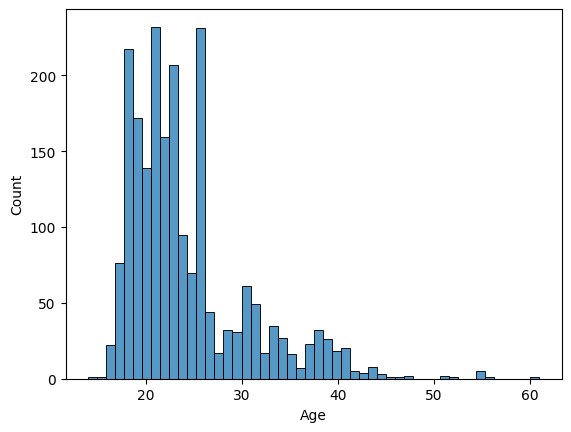

In [8]:
sns.histplot(x="Age",data=df)

Age 17 to 25 is more frequent

<Axes: xlabel='Age', ylabel='Density'>

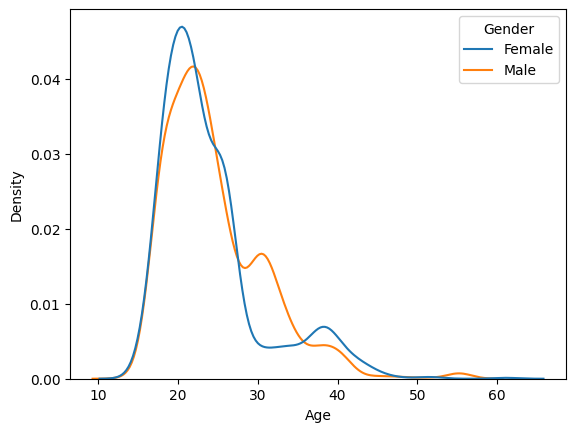

In [9]:
sns.kdeplot(x="Age",data=df,hue="Gender")

<Axes: xlabel='Age'>

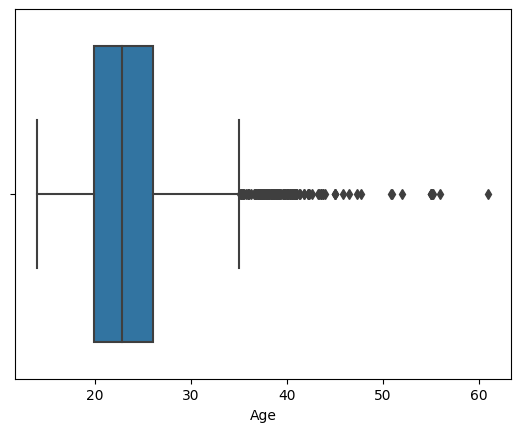

In [10]:
sns.boxplot(x="Age",data=df)

In [11]:
df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

GENDER

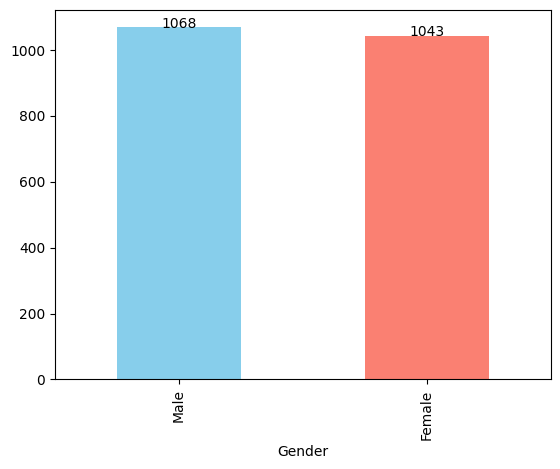

In [12]:
df["Gender"].value_counts().plot(kind="bar",color=['skyblue','salmon'])

for i, v in enumerate(df["Gender"].value_counts()):
    plt.text(i, v, str(v), ha='center')

# Add a legend to the plot


HEIGHT

<Axes: xlabel='Height', ylabel='Count'>

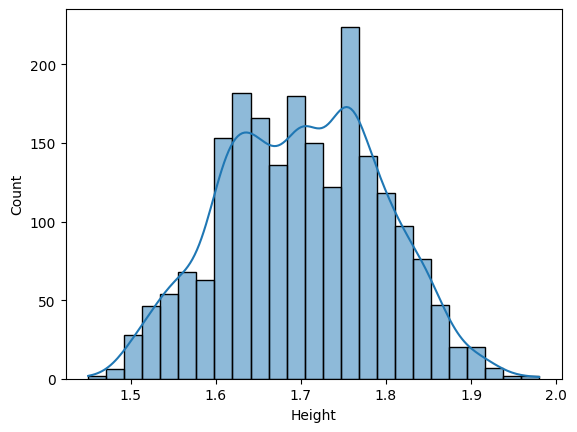

In [13]:
sns.histplot(x="Height",data=df,kde=True)

<Axes: xlabel='Height', ylabel='Density'>

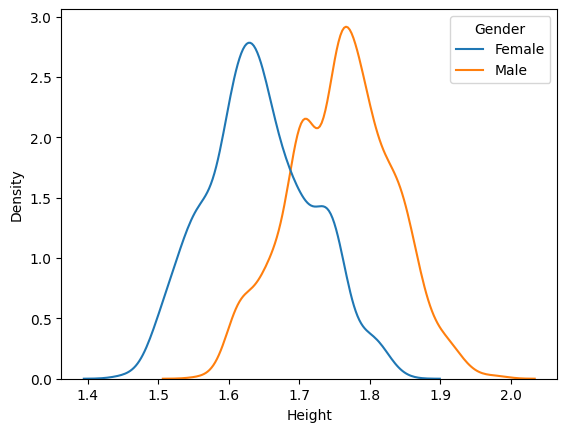

In [14]:
sns.kdeplot(x="Height",data=df,hue="Gender")

<Axes: xlabel='Height'>

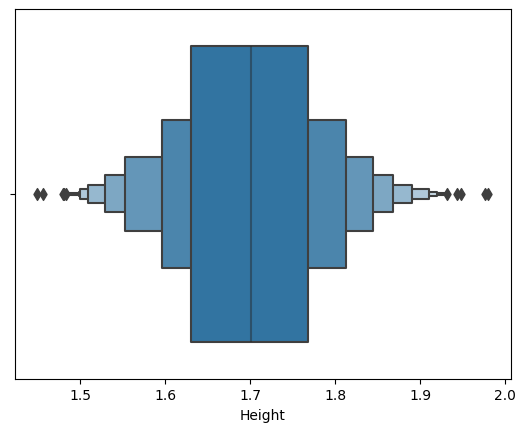

In [15]:
sns.boxenplot(x="Height",data=df)

WEIGHT

<Axes: xlabel='Weight', ylabel='Count'>

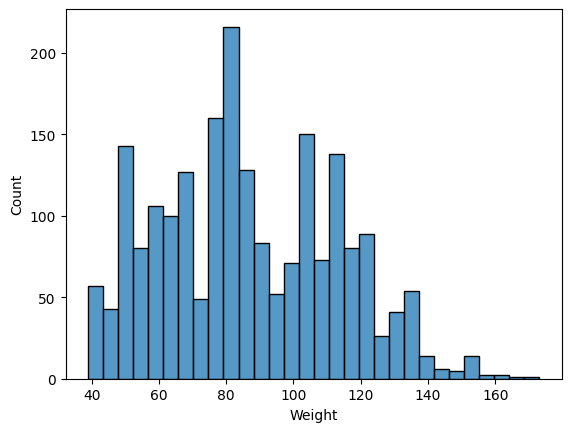

In [16]:
sns.histplot(x="Weight",data=df,bins=30)


<Axes: xlabel='Weight', ylabel='Density'>

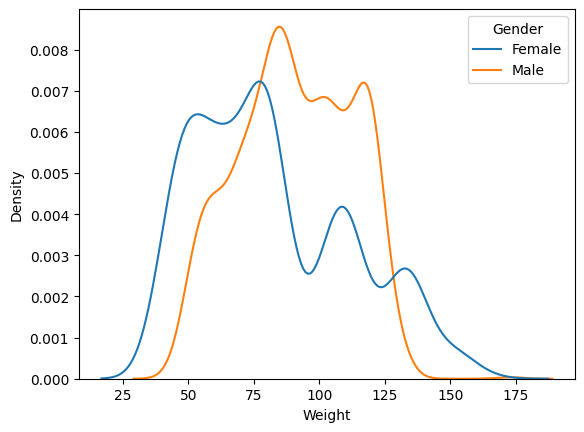

In [17]:
sns.kdeplot(x="Weight",data=df,hue="Gender")

<Axes: xlabel='Weight'>

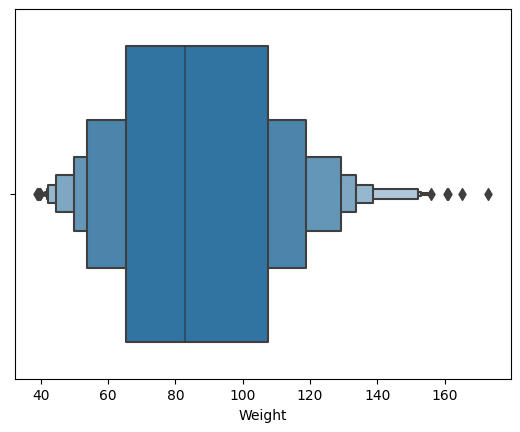

In [18]:
sns.boxenplot(x="Weight",data=df)

,ALCOHOL

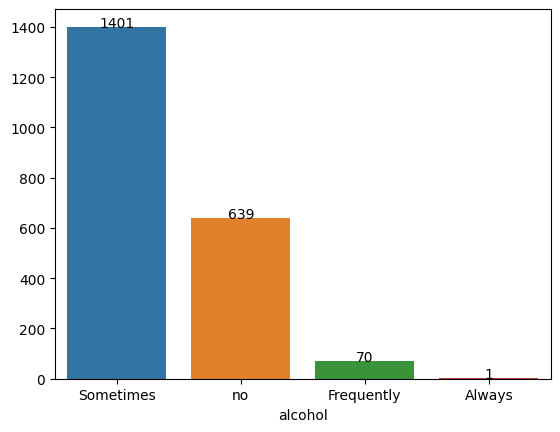

In [19]:
a=df["alcohol"].value_counts()

sns.barplot(x=a.index,y=a.values)


for i,v in enumerate(a.values):
    plt.text(i, v, str(v), ha='center')

plt.show()

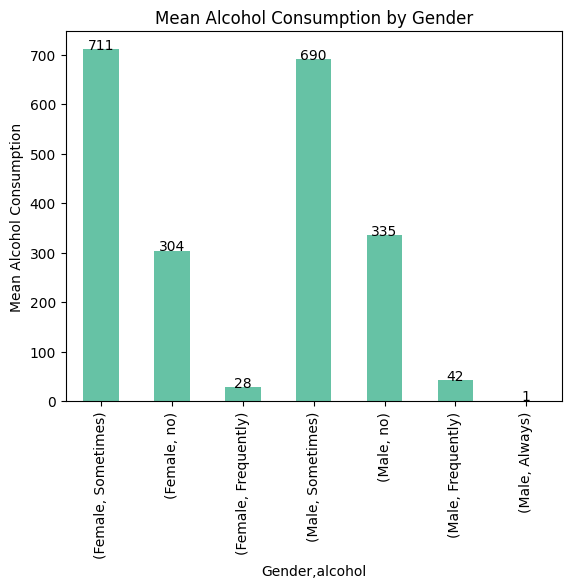

In [20]:
import matplotlib.pyplot as plt

df.groupby("Gender")["alcohol"].value_counts().plot(kind="bar", colormap="Set2")

for i , v in enumerate(df.groupby("Gender")["alcohol"].value_counts()):
    plt.text(i,v,str(v),ha='center')

plt.ylabel("Mean Alcohol Consumption")
plt.title("Mean Alcohol Consumption by Gender")
plt.show()

In [21]:

df.columns


Index(['Age', 'Gender', 'Height', 'Weight', 'alcohol', 'caloric_frequently',
       'veggies', 'no_meals', 'monitor_cal_daily ', 'SMOKE', 'water',
       'family_history_with_overweight', 'physical_act', 'timefortechdevices',
       'food_bet_meals', 'transport', 'Obesity'],
      dtype='object')

<Axes: xlabel='Gender,SMOKE'>

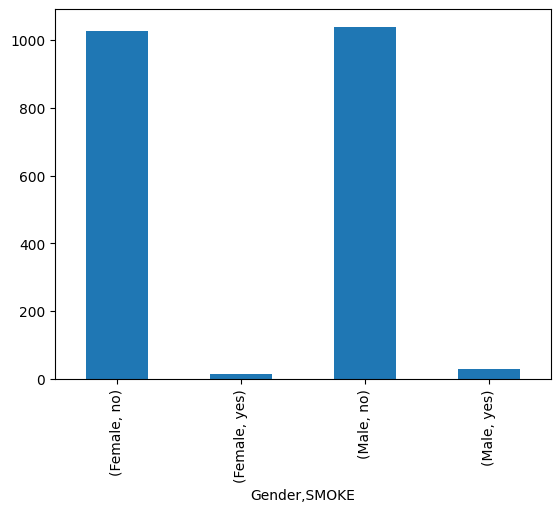

In [22]:
df.groupby("Gender")["SMOKE"].value_counts().plot(kind="bar")

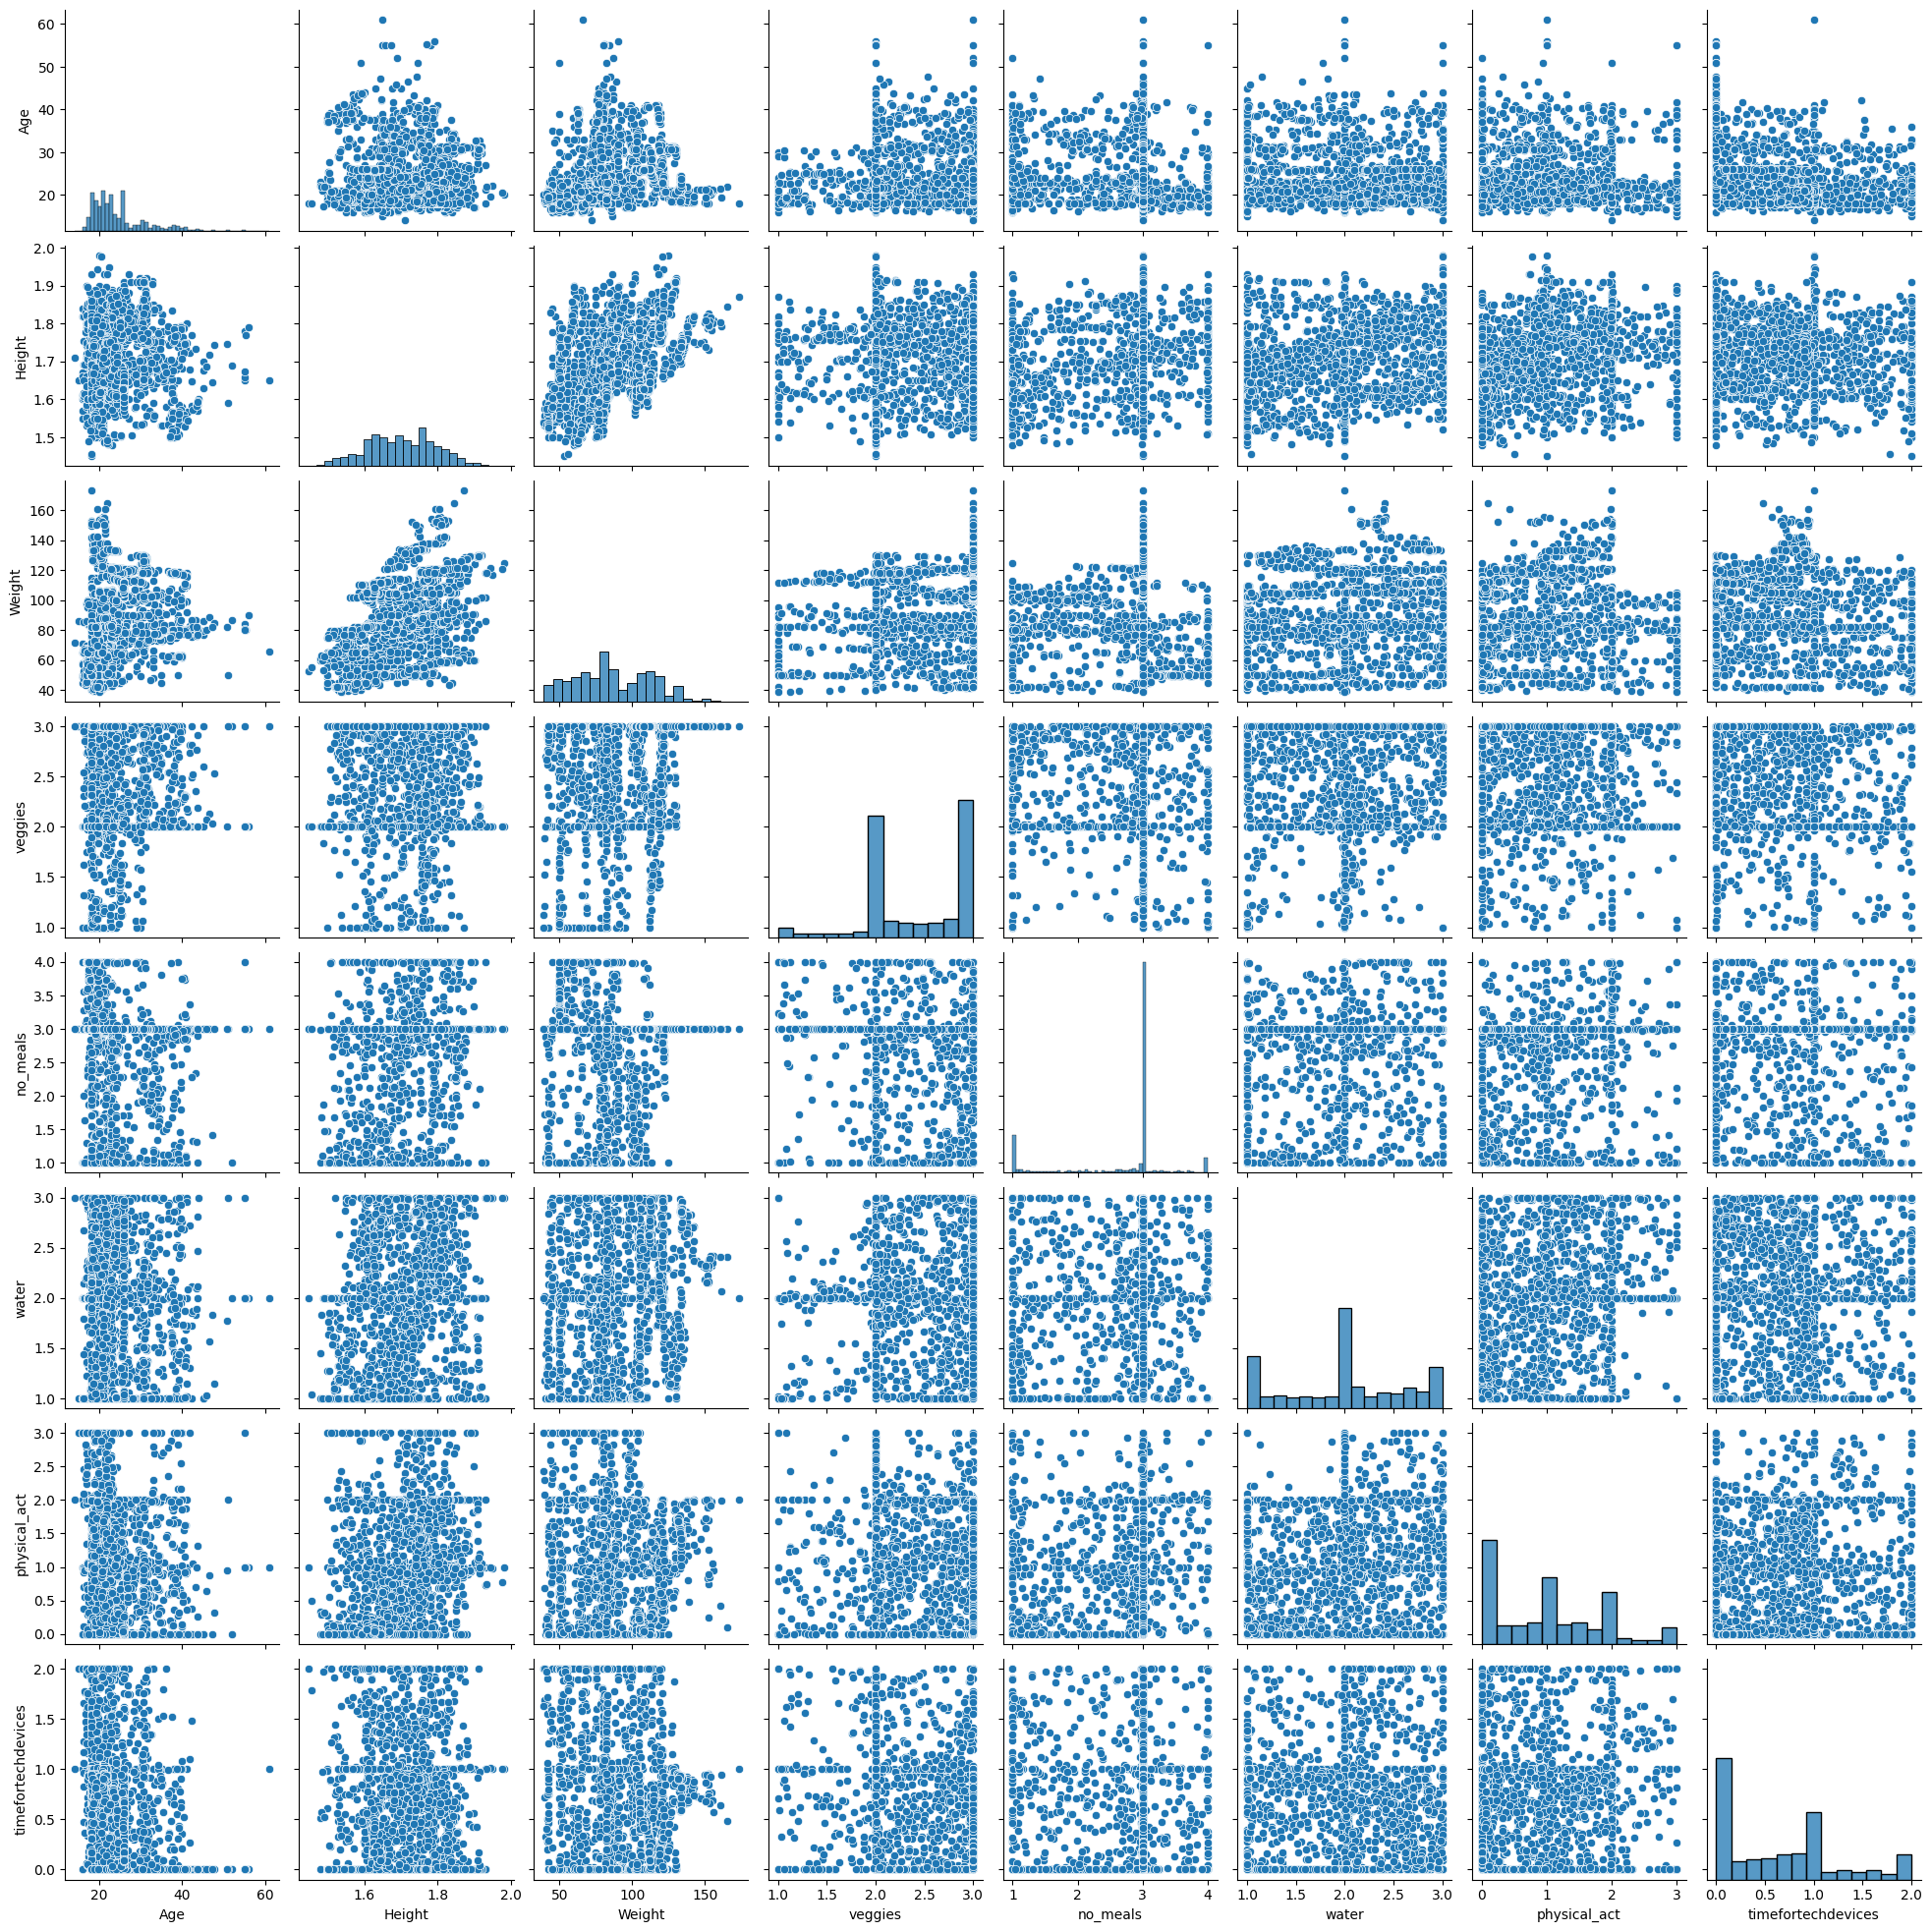

In [23]:
sns.pairplot(data=df)

<Axes: xlabel='Height', ylabel='Weight'>

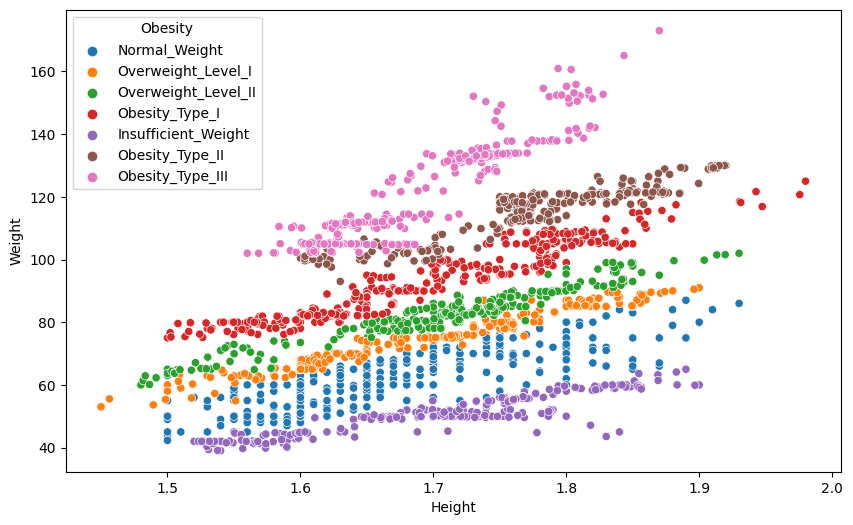

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Height",y="Weight",data=df,hue="Obesity")

<Axes: xlabel='Obesity'>

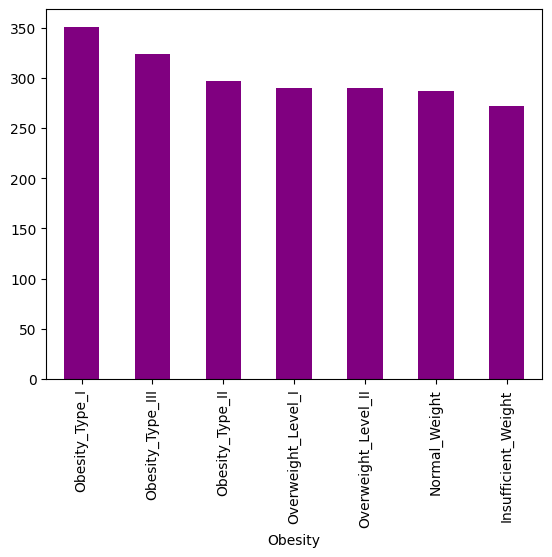

In [25]:
df["Obesity"].value_counts().plot(kind="bar",color="purple")

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df["Gender"]=le.fit_transform(df["Gender"])
df["alcohol"]=le.fit_transform(df["alcohol"])
df["caloric_frequently"]=le.fit_transform(df["caloric_frequently"])
df["monitor_cal_daily "]=le.fit_transform(df["monitor_cal_daily "])
df["SMOKE"]=le.fit_transform(df["SMOKE"])
df["family_history_with_overweight"]=le.fit_transform(df["family_history_with_overweight"])
df["food_bet_meals"]=le.fit_transform(df["food_bet_meals"])
df["transport"]=le.fit_transform(df["transport"])
df["Obesity"]=le.fit_transform(df["Obesity"])

In [28]:
df.head(2)

,Age,Gender,Height,Weight,alcohol,caloric_frequently,veggies,no_meals,monitor_cal_daily,SMOKE,water,family_history_with_overweight,physical_act,timefortechdevices,food_bet_meals,transport,Obesity
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1


<Axes: >

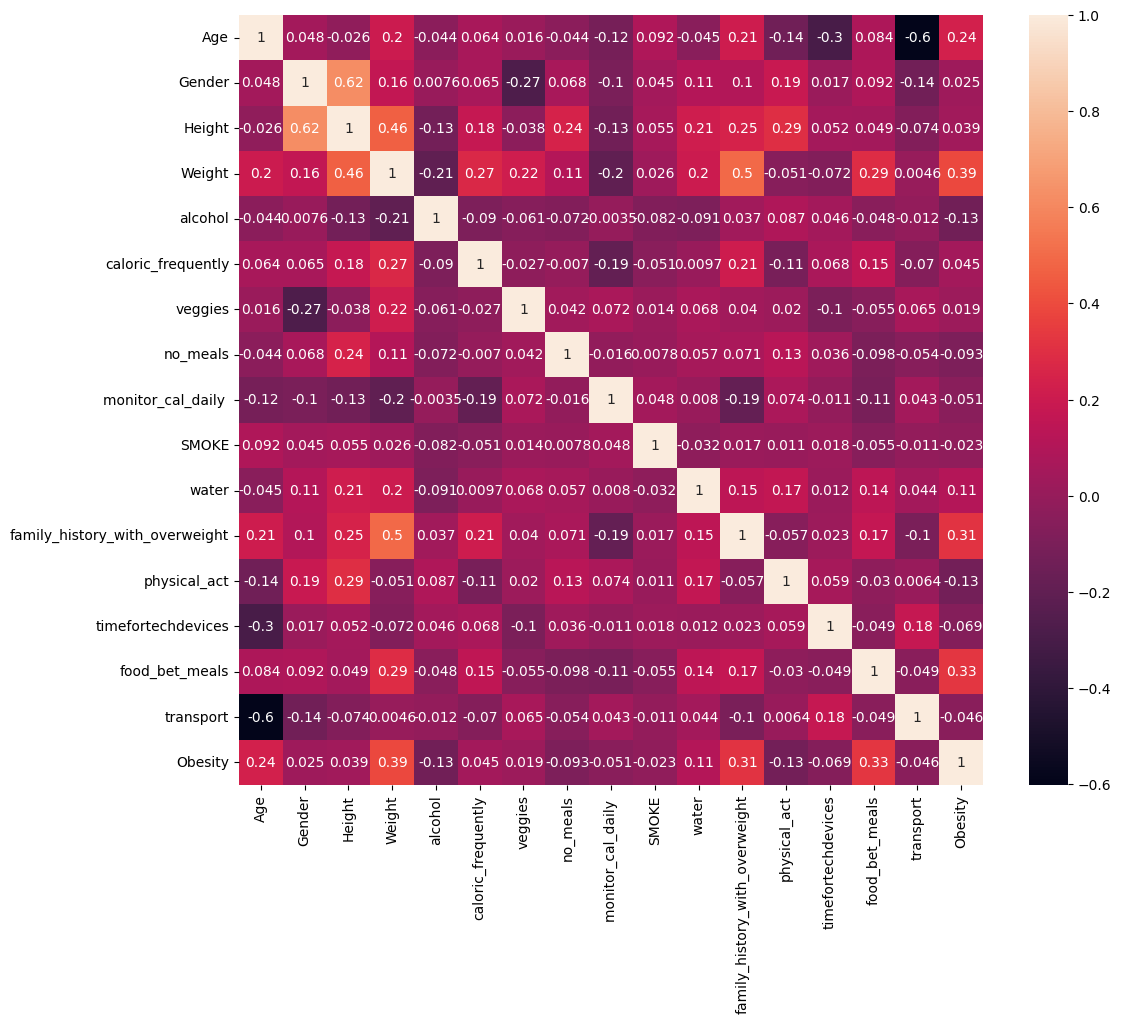

In [29]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

In [30]:
x=df[["Age","Weight","water","family_history_with_overweight","food_bet_meals"]]
y=df["Obesity"]

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [33]:
rc=RandomForestClassifier()

In [34]:
rc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
yp=rc.predict(x_test)

In [36]:
print(accuracy_score(y_test,yp))

0.8794326241134752


In [37]:
confusion_matrix(y_test,yp)

array([[52,  4,  0,  0,  0,  0,  0],
       [ 6, 49,  0,  0,  0,  6,  1],
       [ 0,  2, 68,  1,  2,  0,  5],
       [ 0,  0,  1, 56,  1,  0,  0],
       [ 0,  0,  0,  1, 62,  0,  0],
       [ 1,  6,  0,  0,  0, 47,  2],
       [ 0,  1,  8,  1,  0,  2, 38]], dtype=int64)

In [38]:
classification_report(y_test,yp)

'              precision    recall  f1-score   support\n\n           0       0.88      0.93      0.90        56\n           1       0.79      0.79      0.79        62\n           2       0.88      0.87      0.88        78\n           3       0.95      0.97      0.96        58\n           4       0.95      0.98      0.97        63\n           5       0.85      0.84      0.85        56\n           6       0.83      0.76      0.79        50\n\n    accuracy                           0.88       423\n   macro avg       0.88      0.88      0.88       423\nweighted avg       0.88      0.88      0.88       423\n'

INFORMATION GAIN FEATURE SELECTION

In [39]:
X=df.drop("Obesity",axis=1)
Y=df["Obesity"]

<Axes: >

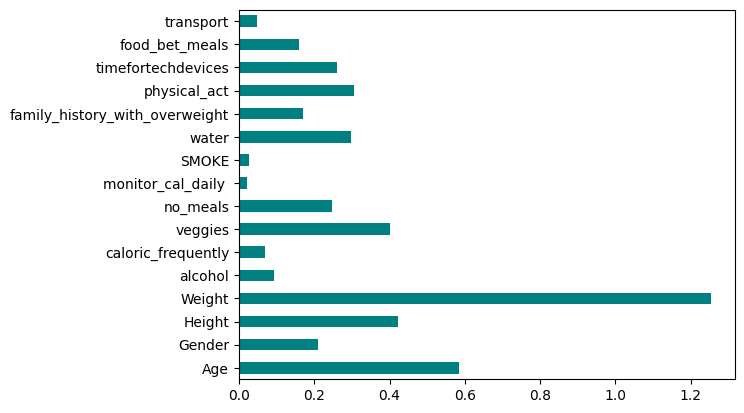

In [40]:
from sklearn.feature_selection import mutual_info_classif
fi=mutual_info_classif(X,Y)
imp=pd.Series(fi,df.columns[0:len(df.columns)-1])
imp.plot(kind='barh',color="teal")

In [41]:
x=df[["Age","Height","Weight","veggies","water","physical_act","timefortechdevices"]]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [43]:
rc.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
yp1=rc.predict(x_test)

In [45]:
accuracy_score(y_test,yp1)

0.9574468085106383

FISHER'S SCORE TEST

In [46]:
!pip install git+https://github.com/jundongl/scikit-feature.git

  Cloning https://github.com/jundongl/scikit-feature.git to c:\users\thris\appdata\local\temp\pip-req-build-n9ldd4fh
  Resolved https://github.com/jundongl/scikit-feature.git to commit 48cffad4e88ff4b9d2f1c7baffb314d1b3303792
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/jundongl/scikit-feature.git 'C:\Users\thris\AppData\Local\Temp\pip-req-build-n9ldd4fh'

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\thris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


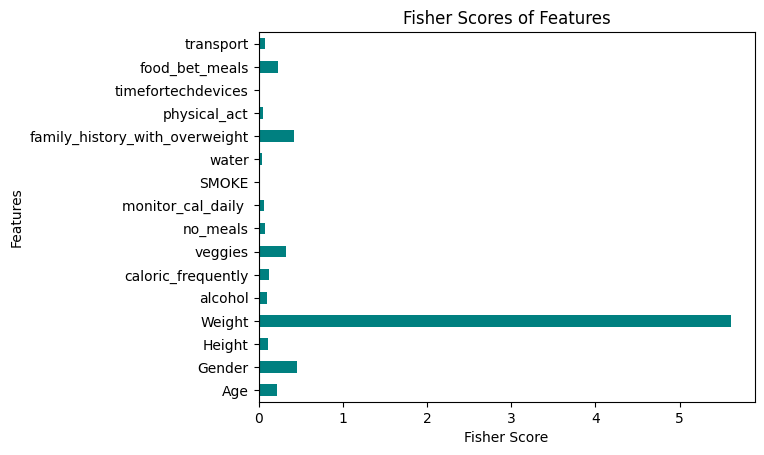

In [47]:
X = df.drop('Obesity',axis=1).values  # Replace 'target_column' with the name of your target column
Y = df['Obesity'].values
from skfeature.function.similarity_based import fisher_score
ranks = fisher_score.fisher_score(X, Y)

# Create a Series with the ranks and corresponding feature names
feat = pd.Series(ranks, index=df.columns[:-1])

# Plot the Fisher Scores
feat.plot(kind='barh', color="teal")

# Add labels and title
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Fisher Scores of Features')

# Show the plot
plt.show()

In [48]:
x=df[["Gender","Weight","veggies","family_history_with_overweight","food_bet_meals"]]

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [50]:
rc.fit(x_train,y_train)
yp2=rc.predict(x_test)
print(accuracy_score(y_test,yp2))


0.806146572104019


WRAPPER - FORWARD FEATURE SELECTION

In [51]:
! pip install mlxtend


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\thris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable
X = df.drop(columns=['Obesity'],axis=1)
y = df['Obesity']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Initialize the Sequential Feature Selector
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          n_jobs=-1, 
          scoring='accuracy',
          cv=5)

# Fit the SFS
sfs = sfs.fit(x_train, y_train)

# Get the selected feature names
selected_features = list(sfs.k_feature_names_)

# Train the Logistic Regression model on the selected features
lr.fit(x_train[selected_features], y_train)

# Predict on the test set
y_pred = lr.predict(x_test[selected_features])

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8132387706855791


C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RANDOM FOREST

<Axes: >

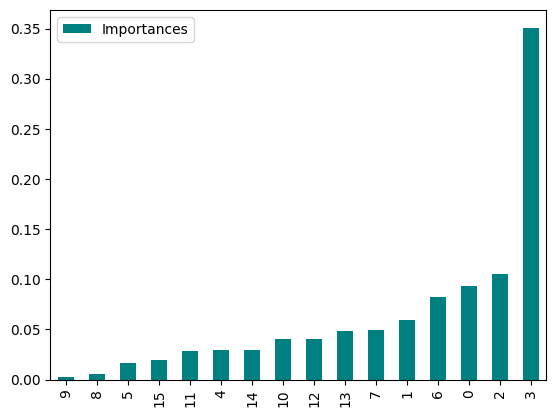

In [59]:
mod=RandomForestClassifier(n_estimators=100)
mod.fit(X,Y)

importances=mod.feature_importances_

dff=pd.DataFrame({"Features":pd.DataFrame(X).columns,"Importances":importances})
dff.set_index("Importances")

dff=dff.sort_values("Importances")

dff.plot.bar(color="teal")

In [60]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'alcohol', 'caloric_frequently',
       'veggies', 'no_meals', 'monitor_cal_daily ', 'SMOKE', 'water',
       'family_history_with_overweight', 'physical_act', 'timefortechdevices',
       'food_bet_meals', 'transport', 'Obesity'],
      dtype='object')

In [61]:
x=df[["Age","Gender","Height","Weight","veggies","no_meals","water","physical_act","timefortechdevices"]]
y=df["Obesity"]

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

rc.fit(x_train,y_train)
ypp=rc.predict(x_test)

print(accuracy_score(y_test,ypp))

0.9550827423167849


In [69]:
dict={"random_forest":0.9550827423167849,
      "wrapper":0.8132387706855791,
      "fisher_score":0.806146572104019,
      "info_gain":0.9574468085106383,
      "correlation":0.8794326241134752}

dt= pd.DataFrame(list(dict.items()), columns=['Method', 'Accuracy'])

In [70]:
dt

,Method,Accuracy
0,random_forest,0.955083
1,wrapper,0.813239
2,fisher_score,0.806147
3,info_gain,0.957447
4,correlation,0.879433


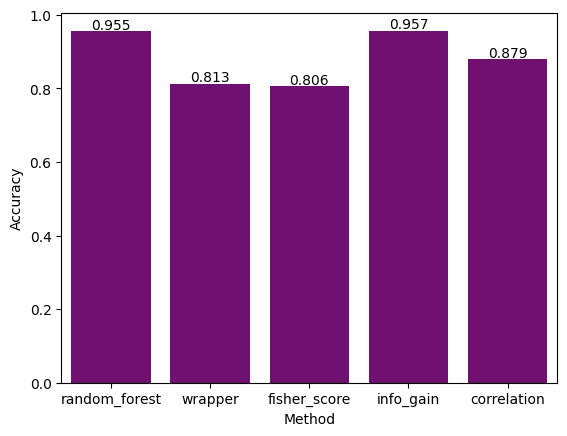

In [76]:
sns.barplot(x="Method",y="Accuracy",data=dt,color='purple')
for i , v in enumerate(dt["Accuracy"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontsize=10)